In [1]:
import pandas as pd
data = pd.read_csv("dynamic_pricing.csv")
print(data.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [2]:
# lets do data quality check to identify missing values or incorrect data types

In [4]:
# check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values_report = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
print(missing_values_report)

                         Missing Values Data Type
Number_of_Riders                      0     int64
Number_of_Drivers                     0     int64
Location_Category                     0    object
Customer_Loyalty_Status               0    object
Number_of_Past_Rides                  0     int64
Average_Ratings                       0   float64
Time_of_Booking                       0    object
Vehicle_Type                          0    object
Expected_Ride_Duration                0     int64
Historical_Cost_of_Ride               0   float64


/home/deb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/deb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/deb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/deb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

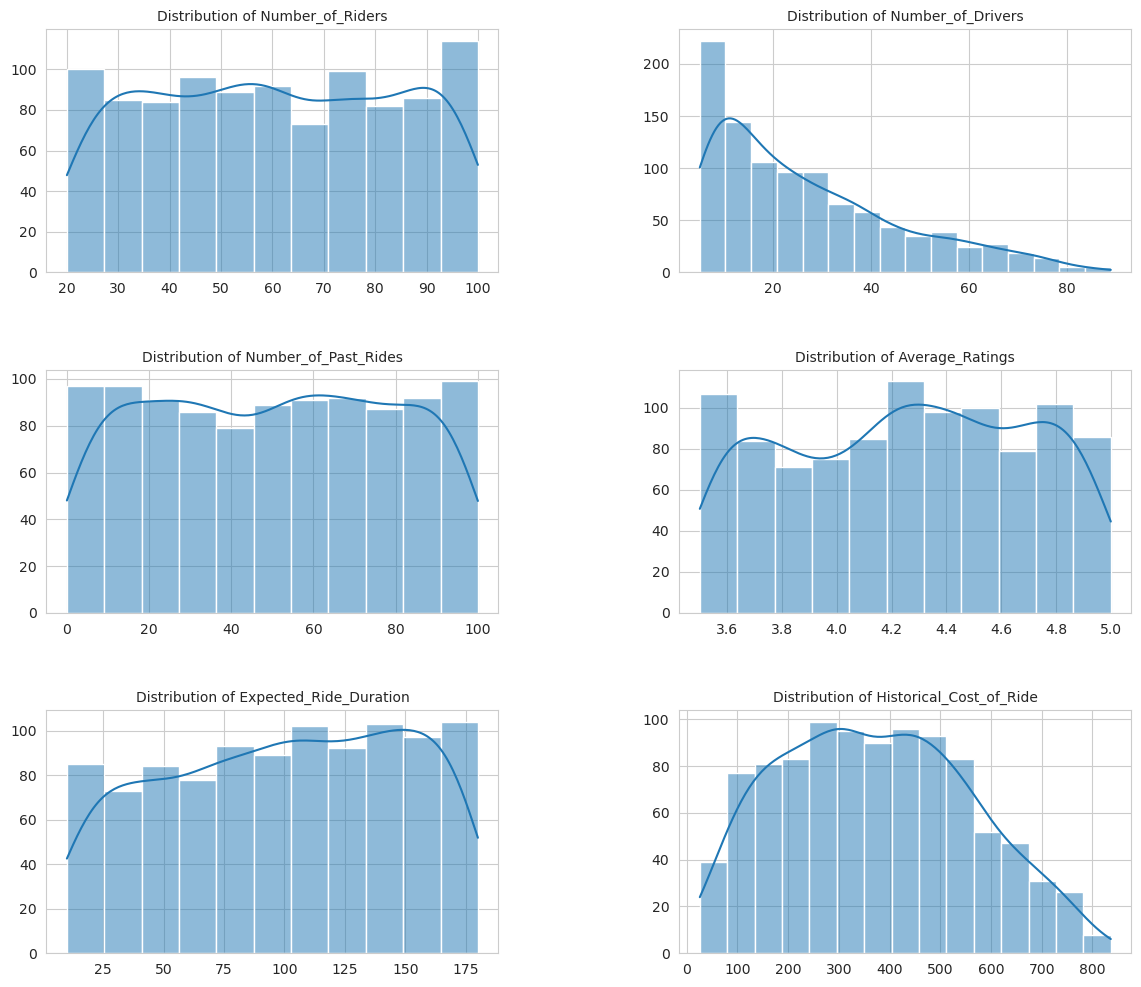

In [10]:
# Univariate Analysis
# lets analyze the distribution of numerical features to understand their distribution

import matplotlib.pyplot as plt
import seaborn as sns

# set the aesthetics for the plots
sns.set_style("whitegrid")

# define the numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
                  'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

# descriptive statistics for numerical features
descriptive_stats = data[numerical_cols].describe()

# plotting distributions for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

print(descriptive_stats)

AttributeError: 'builtin_function_or_method' object has no attribute 'tight_layout'

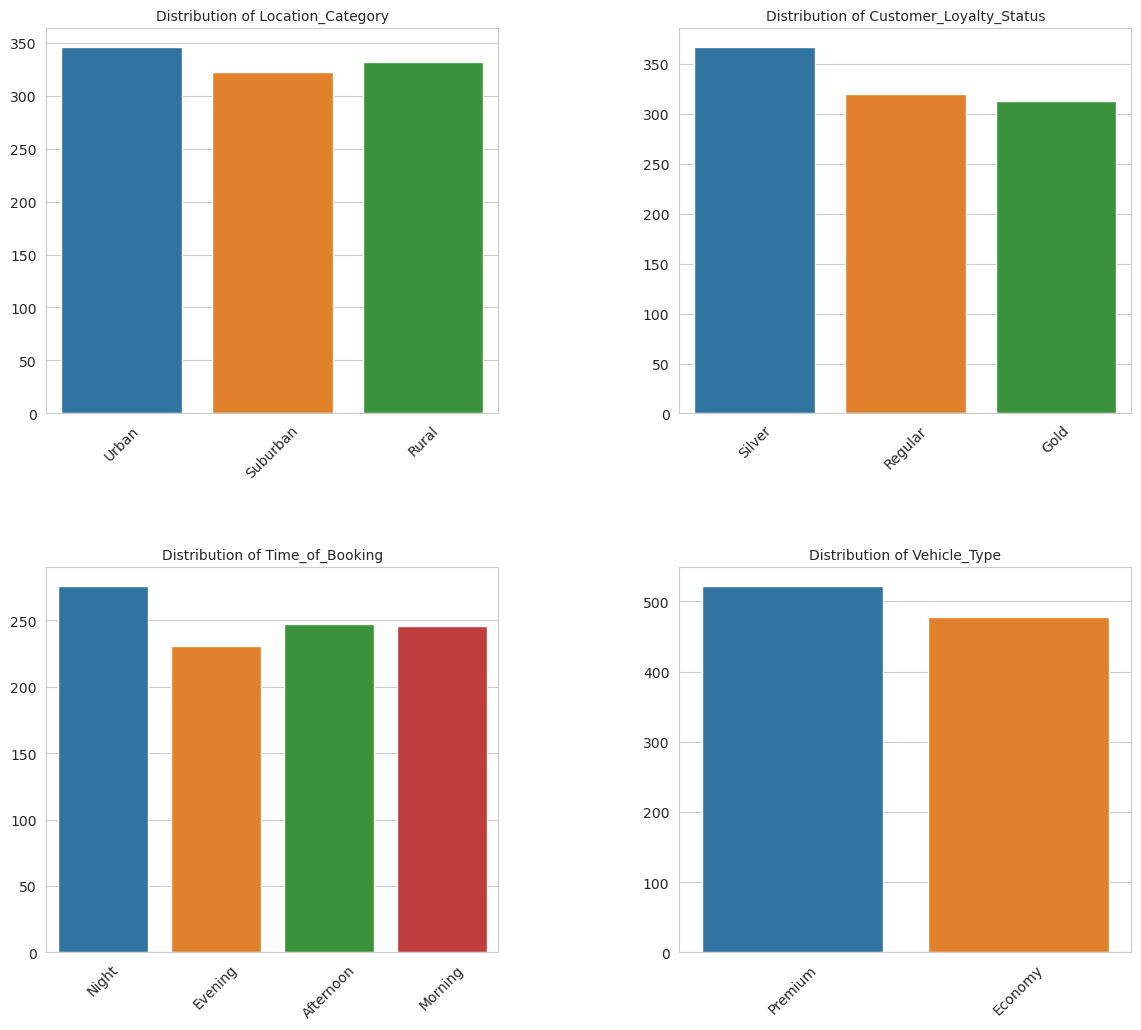

In [15]:
# lets epxlore categorical features

#plotting distributions for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
print.tight_layout()

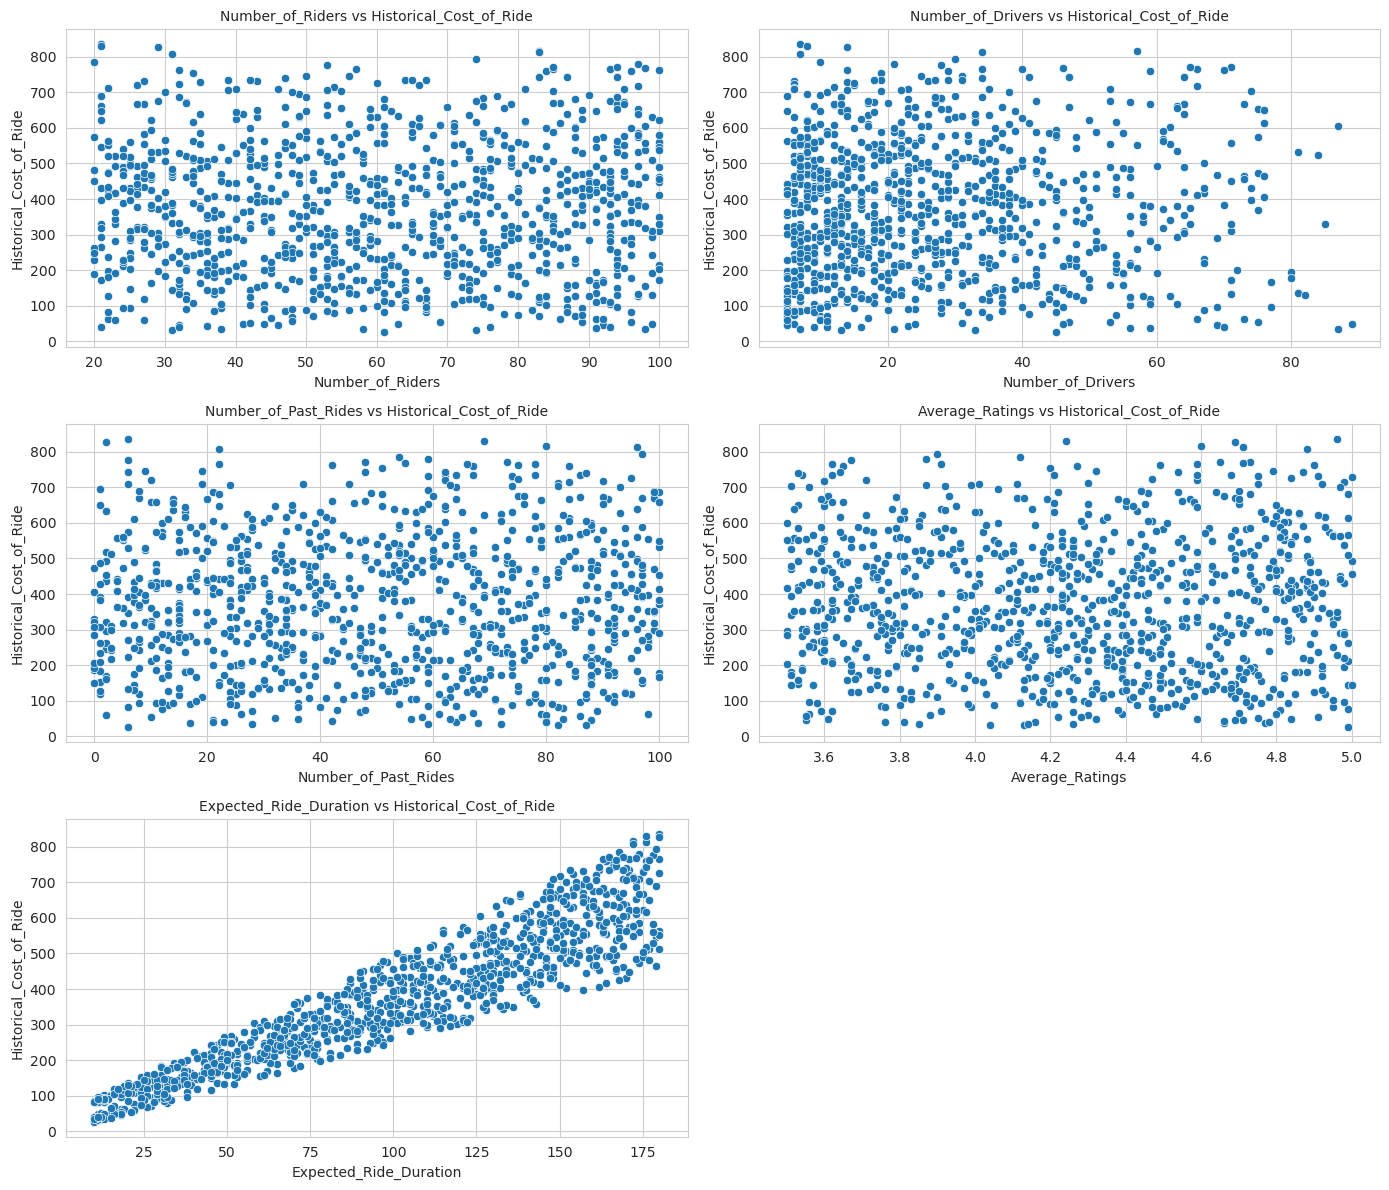

In [18]:
# Bivariate Analysis

num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten()

# plot each numerical column against the historical cost.
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

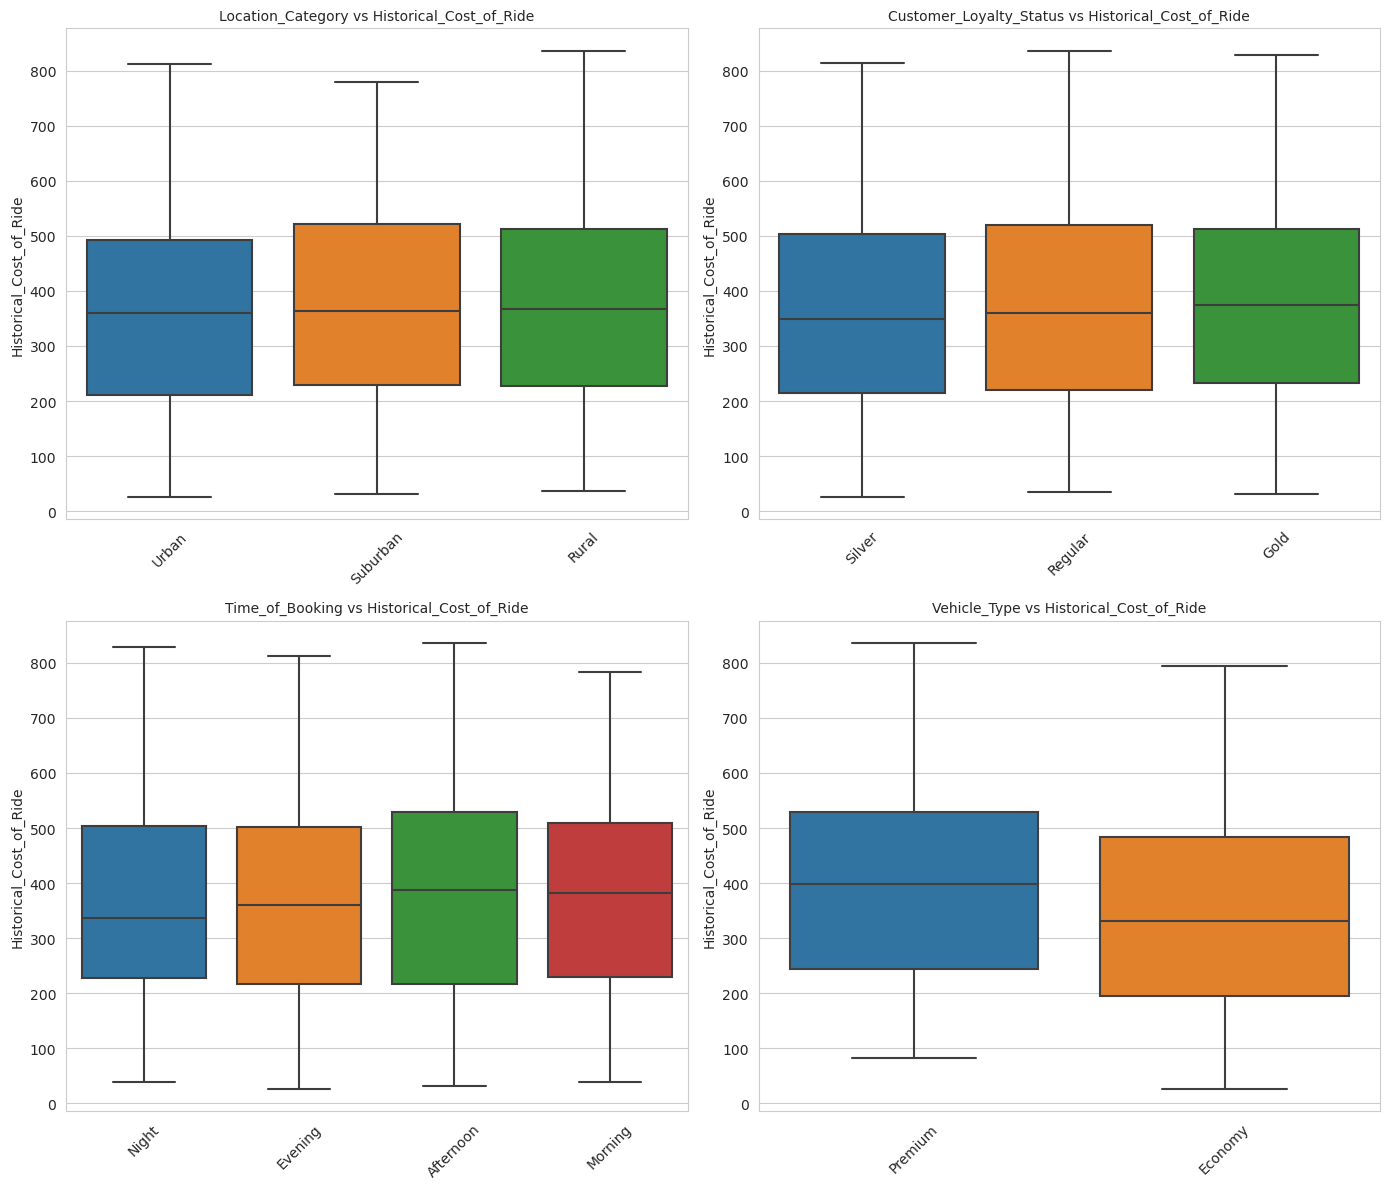

In [21]:
# bivariate Analysis: categorical features vs historical_cost_of_ride
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Historical_Cost_of_Ride')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()